In [1]:
import tensorflow as tf
import keras
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns

Problem 1 & 2

In [4]:
iris_data = load_iris(as_frame=True)

features = iris_data["data"]
target = iris_data["target"]


data = pd.concat([features, target], axis=1)

interest = data.query("target != 2").iloc[:, ::2].to_numpy().astype(np.float32)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(interest[:, :2], interest[:, -1], test_size=0.2)

x_input = x_train.shape[1]

problem 3

In [7]:
model = keras.Sequential()

model.add(keras.layers.Input((x_input,), 20))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, keras.activations.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20)



Epoch 1/20


3/3 [==============================] - 7s 49ms/step - loss: 0.6012 - accuracy: 0.5750
Epoch 2/20
3/3 [==============================] - 0s 0s/step - loss: 0.5646 - accuracy: 0.5750
Epoch 3/20
3/3 [==============================] - 0s 12ms/step - loss: 0.5319 - accuracy: 0.5750
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 0.5012 - accuracy: 0.5750
Epoch 5/20
3/3 [==============================] - 0s 18ms/step - loss: 0.4765 - accuracy: 0.6125
Epoch 6/20
3/3 [==============================] - 0s 54ms/step - loss: 0.4513 - accuracy: 0.6875
Epoch 7/20
3/3 [==============================] - 0s 33ms/step - loss: 0.4253 - accuracy: 0.9125
Epoch 8/20
3/3 [==============================] - 0s 18ms/step - loss: 0.3990 - accuracy: 0.9750
Epoch 9/20
3/3 [==============================] - 0s 8ms/step - loss: 0.3734 - accuracy: 0.9875
Epoch 10/20
3/3 [==============================] - 0s 16ms/step - loss: 0.3495 - accuracy: 1.0000
Epoch 11/20
3/3 [============

In [8]:
model = keras.Sequential()

model.add(keras.layers.Input((x_input,), 20))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, keras.activations.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
3/3 [==============================] - 2s 8ms/step - loss: 0.6113 - accuracy: 0.5750
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.5750
Epoch 3/20
3/3 [==============================] - 0s 8ms/step - loss: 0.5274 - accuracy: 0.5750
Epoch 4/20
3/3 [==============================] - 0s 8ms/step - loss: 0.4928 - accuracy: 0.5750
Epoch 5/20
3/3 [==============================] - 0s 9ms/step - loss: 0.4591 - accuracy: 0.7625
Epoch 6/20
3/3 [==============================] - 0s 4ms/step - loss: 0.4328 - accuracy: 0.9750
Epoch 7/20
3/3 [==============================] - 0s 7ms/step - loss: 0.4016 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 8ms/step - loss: 0.3730 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 0s 9ms/step - loss: 0.3454 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 0s 7ms/step - loss: 0.3181 - accuracy: 1.0000
Epoch 11/20
3/3 [======================

1/1 - 1s - loss: 0.1331 - accuracy: 1.0000 - 506ms/epoch - 506ms/step
1/1 [==============================] - 0s 234ms/step


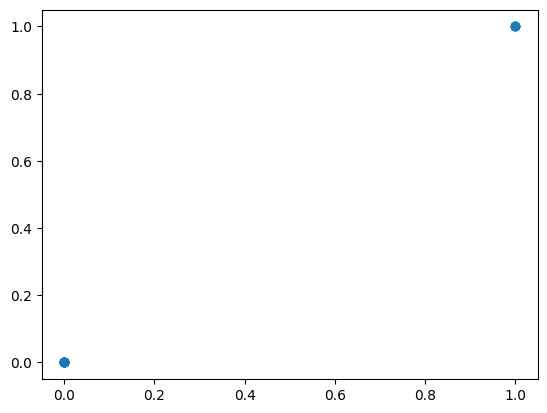

In [9]:
model.evaluate(x_test, y_test, verbose=2)

pred = model.predict(x_test)

plt.scatter(np.where(pred > 0.5, 1, 0), y_test)

Problem 4

In [11]:
class MultiClassification(keras.Model):
    def __init__(self, n_class):
        super().__init__()
        
        self.dense1 = keras.layers.Dense(100, activation="relu")
        self.dense2 = keras.layers.Dense(50, activation="relu")
        self.out = keras.layers.Dense(n_class, activation= "softmax")
    
    def call(self, input, training=False):
        x = self.dense1(input)
        x = self.dense2(x)

        return self.out(x)

In [12]:
x = features.to_numpy()
onv = OneHotEncoder(sparse_output=False)

target = target.to_numpy().reshape(-1, 1)
target = onv.fit_transform(target)
x_train, x_test, y_train, y_test = train_test_split(features.to_numpy(), target, test_size=0.2)



x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.2)

In [14]:
model = MultiClassification(3)

model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=40, batch_size=20, validation_data=[x_val, y_val])

Epoch 1/40
5/5 [==============================] - 4s 153ms/step - loss: 1.1159 - accuracy: 0.3438 - val_loss: 0.9959 - val_accuracy: 0.3750
Epoch 2/40
5/5 [==============================] - 0s 45ms/step - loss: 0.9244 - accuracy: 0.6146 - val_loss: 0.8543 - val_accuracy: 0.7083
Epoch 3/40
5/5 [==============================] - 0s 34ms/step - loss: 0.8002 - accuracy: 0.9375 - val_loss: 0.7273 - val_accuracy: 0.8750
Epoch 4/40
5/5 [==============================] - 0s 35ms/step - loss: 0.7137 - accuracy: 0.6771 - val_loss: 0.6336 - val_accuracy: 0.7500
Epoch 5/40
5/5 [==============================] - 0s 37ms/step - loss: 0.6333 - accuracy: 0.6458 - val_loss: 0.5745 - val_accuracy: 0.8333
Epoch 6/40
5/5 [==============================] - 0s 35ms/step - loss: 0.5712 - accuracy: 0.8333 - val_loss: 0.5232 - val_accuracy: 0.8750
Epoch 7/40
5/5 [==============================] - 0s 32ms/step - loss: 0.5248 - accuracy: 0.8542 - val_loss: 0.4752 - val_accuracy: 0.8750
Epoch 8/40
5/5 [==========

In [15]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 73ms/step - loss: 0.0782 - accuracy: 1.0000


[0.07819619029760361, 1.0]

1/1 [==============================] - 0s 149ms/step


Text(0.5, 0, ' prediction')

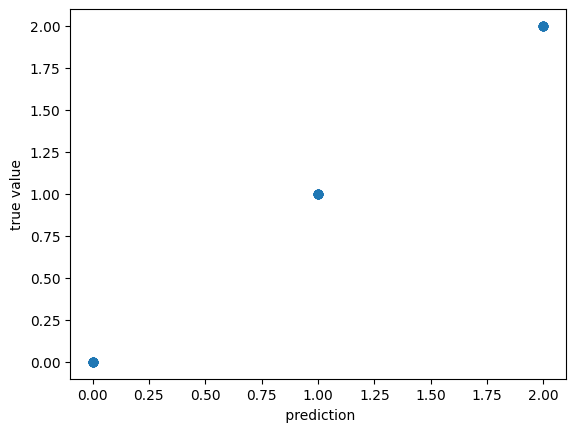

In [16]:
pred = np.argmax(model.predict(x_test), 1)

plt.scatter(pred, np.argmax(y_test, 1))
plt.ylabel("true value")
plt.xlabel(" prediction")

Problem 5

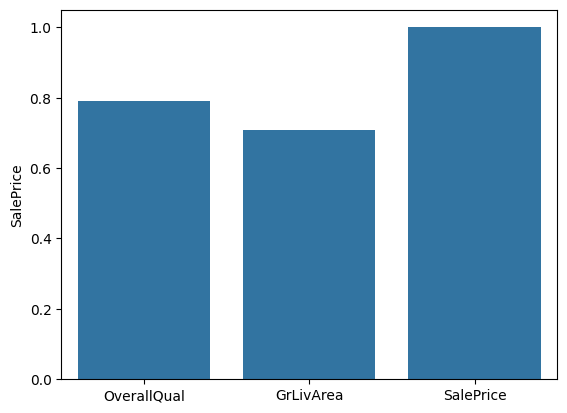

In [17]:
houseData = pd.read_csv("./data/train.csv")

potential = houseData.corr(numeric_only=True)["SalePrice"]
potential = potential[potential > 0.65]

sns.barplot(potential)

features = potential.keys()

x_train, x_test, y_train, y_test = train_test_split(houseData[features].to_numpy(), houseData["SalePrice"], test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [18]:
class LinearRegression(keras.Model):
    def __init__(self):
        super().__init__()
        self.layer1 = keras.layers.Dense(500)
        self.layer2 = keras.layers.Dense(250)
        self.layer3 = keras.layers.Dense(125)
        self.layer4 = keras.layers.Dense(20)
        self.out = keras.layers.Dense(1)
    
    def call(self, x_input):
        x = self.layer1(x_input)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return self.out(x)

In [19]:
linear = LinearRegression()

linear.compile(optimizer=keras.optimizers.Adam(1e-4), loss=keras.losses.mean_squared_logarithmic_error)
linear.fit(x_train, y_train, epochs=50, batch_size=20, validation_data=[x_val, y_val])

Epoch 1/50
47/47 [==============================] - 4s 20ms/step - loss: 0.1507 - val_loss: 0.0071
Epoch 2/50
47/47 [==============================] - 0s 10ms/step - loss: 8.3584e-04 - val_loss: 3.1727e-06
Epoch 3/50
47/47 [==============================] - 1s 12ms/step - loss: 8.3240e-06 - val_loss: 7.3528e-07
Epoch 4/50
47/47 [==============================] - 1s 12ms/step - loss: 2.2644e-07 - val_loss: 2.8996e-07
Epoch 5/50
47/47 [==============================] - 1s 12ms/step - loss: 1.5926e-07 - val_loss: 2.9102e-07
Epoch 6/50
47/47 [==============================] - 1s 15ms/step - loss: 1.5843e-07 - val_loss: 2.8784e-07
Epoch 7/50
47/47 [==============================] - 1s 11ms/step - loss: 1.6004e-07 - val_loss: 2.8902e-07
Epoch 8/50
47/47 [==============================] - 1s 11ms/step - loss: 1.5771e-07 - val_loss: 2.9063e-07
Epoch 9/50
47/47 [==============================] - 1s 11ms/step - loss: 1.5815e-07 - val_loss: 2.8929e-07
Epoch 10/50
47/47 [==========================

10/10 [==============================] - 0s 7ms/step


Text(0, 0.5, 'True value')

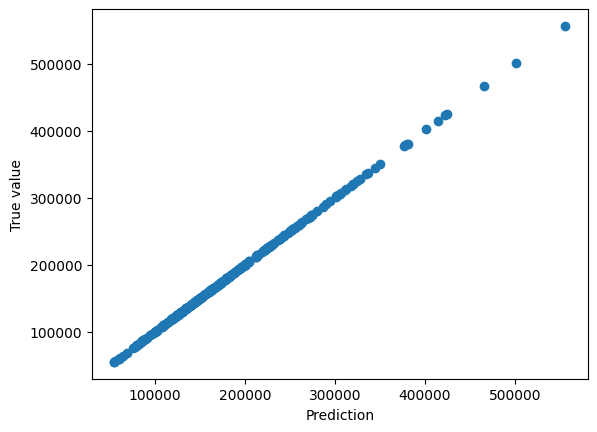

In [20]:
pred = linear.predict(x_test)

plt.scatter(pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("True value")

In [21]:
from keras.datasets.mnist import load_data

In [22]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)
x_train, x_test = x_train/255, x_test/255


y_train = y_train.reshape(-1, 1)
y_train = onv.fit_transform(y_train)

In [23]:
import tensorflow as tf
from tensorflow import keras

model = MultiClassification(10)

model.compile(
    optimizer="Adam", 
    loss=keras.losses.categorical_crossentropy, 
    metrics=["accuracy", tf.keras.metrics.Recall()]
)

model.fit(x_train[:10000], y_train[:10000], epochs=50, batch_size=20)

Epoch 1/50
500/500 [==============================] - 6s 7ms/step - loss: 0.5070 - accuracy: 0.8576 - recall: 0.7771
Epoch 2/50
500/500 [==============================] - 3s 6ms/step - loss: 0.2088 - accuracy: 0.9386 - recall: 0.9234
Epoch 3/50
500/500 [==============================] - 3s 6ms/step - loss: 0.1436 - accuracy: 0.9565 - recall: 0.9489
Epoch 4/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0976 - accuracy: 0.9701 - recall: 0.9646
Epoch 5/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0774 - accuracy: 0.9772 - recall: 0.9740
Epoch 6/50
500/500 [==============================] - 3s 7ms/step - loss: 0.0586 - accuracy: 0.9825 - recall: 0.9792
Epoch 7/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0428 - accuracy: 0.9884 - recall: 0.9857
Epoch 8/50
500/500 [==============================] - 3s 7ms/step - loss: 0.0324 - accuracy: 0.9905 - recall: 0.9891
Epoch 9/50
500/500 [==============================] - 3s 6ms/ste

In [24]:
pred = np.argmax(model.predict(x_test), 1)

y_test

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
c = sum(pred == y_test * 1)

In [26]:
accuracy = c/pred.shape[0]

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


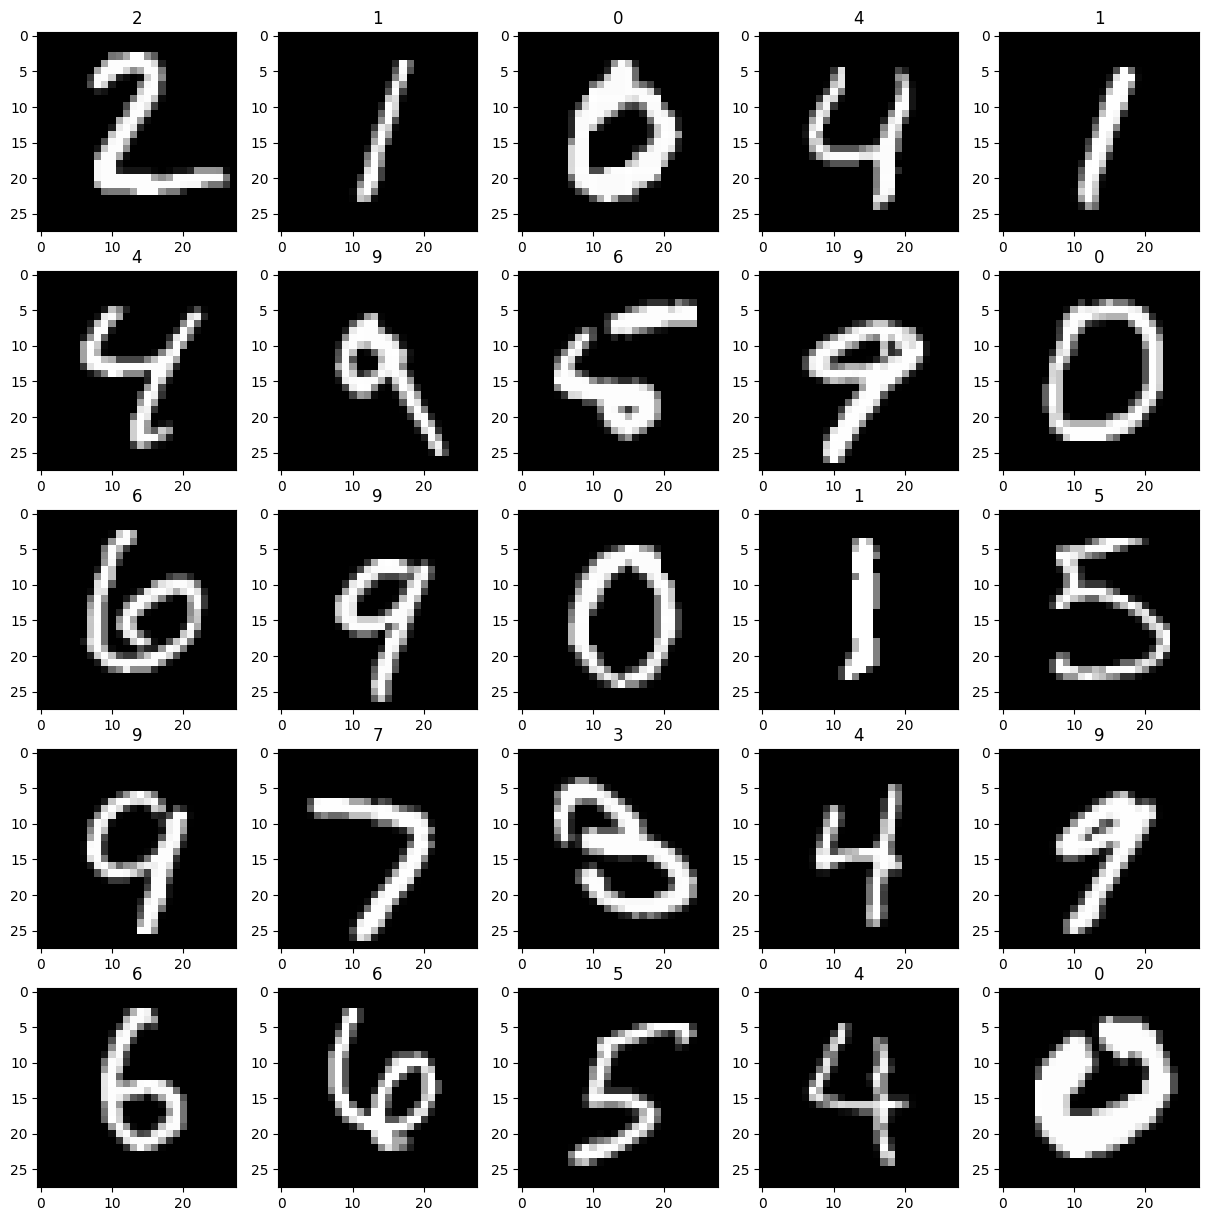

In [27]:
fig = plt.figure(figsize=(15, 15))
x_test = x_test.reshape(-1, 28, 28)
for i in range(1, 26):
    axes = plt.subplot(5, 5, i)
    axes.imshow(x_test[i], "grey")
    axes.set_title(pred[i])